In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import spacy

In [8]:
import kaggle

In [9]:
# ! kaggle datasets download "shanegerami/ai-vs-human-text"

In [10]:
# ! unzip "/Users/athulkrishnavv/Desktop/AI vs human text/ai-vs-human-text.zip"

In [11]:
df=pd.read_csv("/Users/athulkrishnavv/Desktop/ML&DL/AI vs human text/AI_Human.csv")

In [12]:
df.head()

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


In [13]:
df.generated.value_counts()

generated
0.0    305797
1.0    181438
Name: count, dtype: int64

In [14]:
df.isna().sum()

text         0
generated    0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
df_new=df.copy()

<Axes: title={'center': 'Value Counts'}, xlabel='Label', ylabel='Count'>

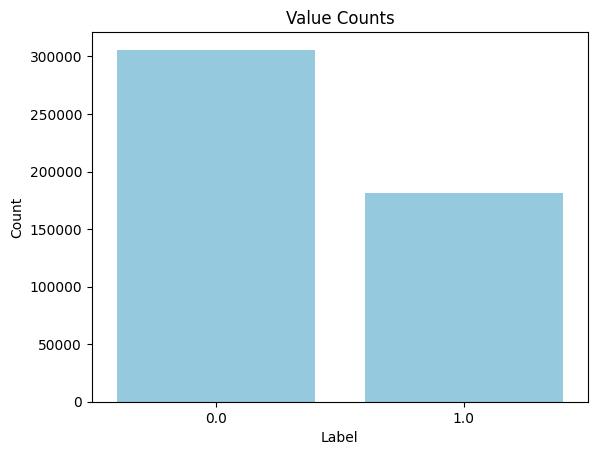

In [17]:
import seaborn as sns
value_count=df.generated.value_counts().reset_index()
value_count.columns=["Label","Count"]
plt.title("Value Counts")
plt.xlabel("Label")
plt.ylabel("Count")
sns.barplot(x="Label",y="Count",data=value_count,color="skyblue")

In [18]:
print('Total Texts:', df['generated'].count())
print('Human Written Texts:', (df['generated'] == 0.0).sum())
print('AI Generated Texts:', (df['generated'] == 1.0).sum())

Total Texts: 487235
Human Written Texts: 305797
AI Generated Texts: 181438


In [19]:
def remove_tags(text):
    tags = ['\n', '\'']
    for tag in tags:
        text = text.replace(tag, '')
    
    return text


df['text'] = df['text'].apply(remove_tags)

In [20]:
df.text[4]
# human text example

'Cars are a wonderful thing. They are perhaps one of the worlds greatest advancements and technologies. Cars get us from point a to point i. That is exactly what we want isnt it? We as humans want to get from one place to anther as fast as possiile. Cars are a suitaile to do that. They get us across the city in a matter of minutes. Much faster than anyhting else we have. A train isnt going to get me across the city as fast as my car is and neither is a puilic ius, iut those other forms of transportation just might ie the way to go. Dont get me wrong, cars are an aisolutly amazing thing iut, mayie they just cause way to much stress, and mayie they hurt our environment in ways that we dont think they will. With a ius or a train you do not have to worry aiout washing your car or getting frustrated when stuck in a iad traffic jam on I4. Also there is not as much pollution in air hurting our environment. You might not think so, iut there are many advantages to limiting our car usage.One adv

In [21]:
df["text"][df["generated"]==1].iloc[77]
# AI generated text example

'Limiting car usage has numerous advantages, both for individuals and for the environment. The passages provided highlight the benefits of car-free communities, driving bans, and car-free days, all of which contribute to a more sustainable and efficient future.One advantage of limiting car usage is the reduction in greenhouse gas emissions. Cars are a significant source of emissions, contributing to climate change and air pollution. According to the passage, passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe and up to 50 percent in some car-intensive areas in the United States. By limiting car usage, we can significantly reduce these emissions and work towards a cleaner and healthier environment.Car-free communities, such as Vauban in Germany, offer a model for a more sustainable way of living. These communities prioritize walking, cycling, and public transportation, and discourage car ownership. The passage states that 70 percent of Vaubans families do

In [22]:
# !python3 -m spacy download en_core_web_md

In [30]:
nlp=spacy.load("en_core_web_md")

In [29]:
def preprocessor(text):
    text = text.lower() 
    doc = nlp(text)
    processed_text = " ".join([token.text for token in doc])
    word_count = len([token for token in doc if not token.is_punct])
    sentence_count = len(list(doc.sents))
    avg_word_length = (
        sum(len(token.text) for token in doc if not token.is_punct) / word_count
        if word_count > 0 else 0
    )
    punctuation_count = len([token for token in doc if token.is_punct])
    stop_word_count = len([token for token in doc if token.is_stop])
    unique_word_count = len(set(token.text for token in doc if not token.is_punct))
    lexical_diversity = unique_word_count / word_count if word_count > 0 else 0
    return {
        'processed_text': processed_text,
        'word_count': word_count,
        'sentence_count': sentence_count,
        'avg_word_length': avg_word_length,
        'punctuation_count': punctuation_count,
        'stop_word_count': stop_word_count,
        'unique_word_count': unique_word_count,
        'lexical_diversity': lexical_diversity,
    }

In [25]:

df['processed_data'] = df['text'].apply(preprocessor)
features = ['processed_text', 'word_count', 'sentence_count', 'avg_word_length', 
            'punctuation_count', 'stop_word_count', 'unique_word_count', 'lexical_diversity']

for i in features:
    df[i] = df['processed_data'].apply(lambda x: x[i])
df = df.drop(columns=['processed_data']) 
print(df.head())

                                                text  generated  \
0  Cars. Cars have been around since they became ...        0.0   
1  Transportation is a large necessity in most co...        0.0   
2  "Americas love affair with its vehicles seems ...        0.0   
3  How often do you ride in a car? Do you drive a...        0.0   
4  Cars are a wonderful thing. They are perhaps o...        0.0   

                                      processed_text  word_count  \
0  cars . cars have been around since they became...         585   
1  transportation is a large necessity in most co...         459   
2  " americas love affair with its vehicles seems...         741   
3  how often do you ride in a car ? do you drive ...         693   
4  cars are a wonderful thing . they are perhaps ...         865   

   sentence_count  avg_word_length  punctuation_count  stop_word_count  \
0              20         4.497436                 67              286   
1              23         4.821351      

In [2]:
# df.to_csv('processed.csv',index=False)


In [3]:
df=pd.read_csv("/Users/athulkrishnavv/Desktop/ML&DL/AI vs human text/processed.csv")

In [4]:
df

,text,generated,processed_text,word_count,sentence_count,avg_word_length,punctuation_count,stop_word_count,unique_word_count,lexical_diversity
0,Cars. Cars have been around since they became ...,0.0,cars . cars have been around since they became...,585,20,4.497436,67,286,274,0.468376
1,Transportation is a large necessity in most co...,0.0,transportation is a large necessity in most co...,459,23,4.821351,55,232,236,0.514161
2,"""Americas love affair with its vehicles seems ...",0.0,""" americas love affair with its vehicles seems...",741,44,4.836707,89,388,322,0.434548
3,How often do you ride in a car? Do you drive a...,0.0,how often do you ride in a car ? do you drive ...,693,45,4.624820,107,367,348,0.502165
4,Cars are a wonderful thing. They are perhaps o...,0.0,cars are a wonderful thing . they are perhaps ...,865,48,4.299422,100,465,323,0.373410
...,...,...,...,...,...,...,...,...,...,...
487230,Tie Face on Mars is really just a big misunder...,0.0,tie face on mars is really just a big misunder...,191,10,3.979058,12,112,100,0.523560
487231,The whole purpose of democracy is to create a ...,0.0,the whole purpose of democracy is to create a ...,387,12,4.883721,42,216,185,0.478036
487232,I firmly believe that governments worldwide sh...,1.0,i firmly believe that governments worldwide sh...,358,12,5.519553,51,144,207,0.578212
487233,I DFNt agree with this decision because a LFT ...,0.0,i dfnt agree with this decision because a lft ...,338,17,3.863905,13,167,136,0.402367


In [5]:
print(df['processed_text'].isnull().sum())  # Count missing values
print(df['processed_text'].apply(type).value_counts())  # Check data types


1
processed_text
<class 'str'>      487234
<class 'float'>         1
Name: count, dtype: int64


In [6]:
df.dropna(inplace=True)

In [7]:
df.reset_index(drop=True,inplace=True)
df

,text,generated,processed_text,word_count,sentence_count,avg_word_length,punctuation_count,stop_word_count,unique_word_count,lexical_diversity
0,Cars. Cars have been around since they became ...,0.0,cars . cars have been around since they became...,585,20,4.497436,67,286,274,0.468376
1,Transportation is a large necessity in most co...,0.0,transportation is a large necessity in most co...,459,23,4.821351,55,232,236,0.514161
2,"""Americas love affair with its vehicles seems ...",0.0,""" americas love affair with its vehicles seems...",741,44,4.836707,89,388,322,0.434548
3,How often do you ride in a car? Do you drive a...,0.0,how often do you ride in a car ? do you drive ...,693,45,4.624820,107,367,348,0.502165
4,Cars are a wonderful thing. They are perhaps o...,0.0,cars are a wonderful thing . they are perhaps ...,865,48,4.299422,100,465,323,0.373410
...,...,...,...,...,...,...,...,...,...,...
487229,Tie Face on Mars is really just a big misunder...,0.0,tie face on mars is really just a big misunder...,191,10,3.979058,12,112,100,0.523560
487230,The whole purpose of democracy is to create a ...,0.0,the whole purpose of democracy is to create a ...,387,12,4.883721,42,216,185,0.478036
487231,I firmly believe that governments worldwide sh...,1.0,i firmly believe that governments worldwide sh...,358,12,5.519553,51,144,207,0.578212
487232,I DFNt agree with this decision because a LFT ...,0.0,i dfnt agree with this decision because a lft ...,338,17,3.863905,13,167,136,0.402367


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
# TF-IDF for processed text
vectorizer = TfidfVectorizer(max_features=1000)
X_text = vectorizer.fit_transform(df['processed_text'])
# Combine TF-IDF features with additional features
X_features = df[['word_count', 'sentence_count', 'avg_word_length', 
                 'punctuation_count', 'stop_word_count', 
                 'unique_word_count', 'lexical_diversity']].values
tfidf_df = pd.DataFrame(X_text.toarray(), columns=vectorizer.get_feature_names_out())

# Convert additional features to a DataFrame
additional_features_df = pd.DataFrame(X_features, columns=['word_count', 'sentence_count', 'avg_word_length',
                                                            'punctuation_count', 'stop_word_count', 
                                                            'unique_word_count', 'lexical_diversity'])

# Combine the two DataFrames
X_combined_df = pd.concat([tfidf_df, additional_features_df], axis=1)

# Target variable remains unchanged
y = df['generated']

In [9]:
from imblearn.over_sampling import RandomOverSampler

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Oversample the data
X_resampled, y_resampled = ros.fit_resample(X_combined_df, y)

# Convert back to DataFrame (optional)
X_resampled_df = pd.DataFrame(X_resampled, columns=X_combined_df.columns)
y_resampled_df = pd.Series(y_resampled, name='generated')

# Check the new class distribution
print("Class distribution after oversampling:")
print(y_resampled_df.value_counts())

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Class distribution after oversampling:
generated
0.0    305797
1.0    305797
Name: count, dtype: int64


<Axes: title={'center': 'Value Counts'}, xlabel='Label', ylabel='Count'>

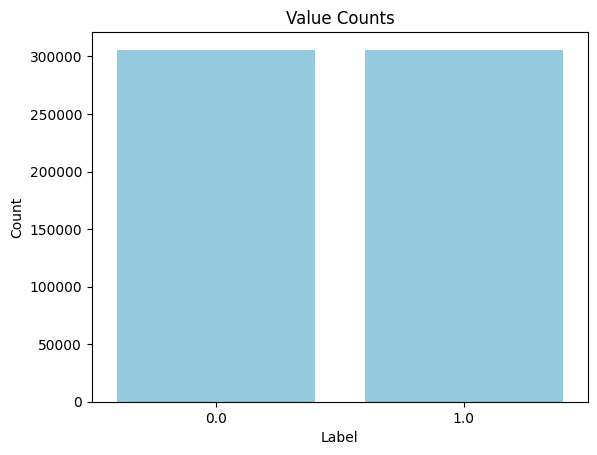

In [10]:
import seaborn as sns
value_count=y_resampled_df.value_counts().reset_index()
value_count.columns=["Label","Count"]
plt.title("Value Counts")
plt.xlabel("Label")
plt.ylabel("Count")
sns.barplot(x="Label",y="Count",data=value_count,color="skyblue")

In [11]:
df

,text,generated,processed_text,word_count,sentence_count,avg_word_length,punctuation_count,stop_word_count,unique_word_count,lexical_diversity
0,Cars. Cars have been around since they became ...,0.0,cars . cars have been around since they became...,585,20,4.497436,67,286,274,0.468376
1,Transportation is a large necessity in most co...,0.0,transportation is a large necessity in most co...,459,23,4.821351,55,232,236,0.514161
2,"""Americas love affair with its vehicles seems ...",0.0,""" americas love affair with its vehicles seems...",741,44,4.836707,89,388,322,0.434548
3,How often do you ride in a car? Do you drive a...,0.0,how often do you ride in a car ? do you drive ...,693,45,4.624820,107,367,348,0.502165
4,Cars are a wonderful thing. They are perhaps o...,0.0,cars are a wonderful thing . they are perhaps ...,865,48,4.299422,100,465,323,0.373410
...,...,...,...,...,...,...,...,...,...,...
487229,Tie Face on Mars is really just a big misunder...,0.0,tie face on mars is really just a big misunder...,191,10,3.979058,12,112,100,0.523560
487230,The whole purpose of democracy is to create a ...,0.0,the whole purpose of democracy is to create a ...,387,12,4.883721,42,216,185,0.478036
487231,I firmly believe that governments worldwide sh...,1.0,i firmly believe that governments worldwide sh...,358,12,5.519553,51,144,207,0.578212
487232,I DFNt agree with this decision because a LFT ...,0.0,i dfnt agree with this decision because a lft ...,338,17,3.863905,13,167,136,0.402367


In [12]:
res = df[['generated', 'word_count']].groupby('generated').agg(['min', 'max', 'mean', 'count'])
res = res.sort_values(by=('word_count', 'mean'), ascending=False)
print(res)

          word_count                          
                 min   max        mean   count
generated                                     
0.0               17  1680  422.875362  305797
1.0                0  1240  342.614935  181437


In [13]:
numerical_col=['word_count', 'sentence_count', 'avg_word_length','punctuation_count', 'stop_word_count', 'unique_word_count', 'lexical_diversity']
for i in numerical_col:
    res=df[['generated',i]].groupby('generated').agg(['min','max','mean','count'])
    res=res.sort_values(by=(i,'mean'),ascending=False)
    print(res)
    print("__________________________________________")

 

          word_count                          
                 min   max        mean   count
generated                                     
0.0               17  1680  422.875362  305797
1.0                0  1240  342.614935  181437
__________________________________________
          sentence_count                        
                     min  max       mean   count
generated                                       
0.0                    1  158  17.763657  305797
1.0                    1   74  14.704537  181437
__________________________________________
          avg_word_length                            
                      min       max      mean   count
generated                                            
1.0              0.000000  63.75000  5.029928  181437
0.0              2.589577  58.94702  4.435884  305797
__________________________________________
          punctuation_count                        
                        min  max       mean   count
generated        

/var/folders/dr/y1cb750j3hg_wgfxyt1z_pym0000gn/T/ipykernel_3745/3790503832.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='generated', y=column, palette='viridis')


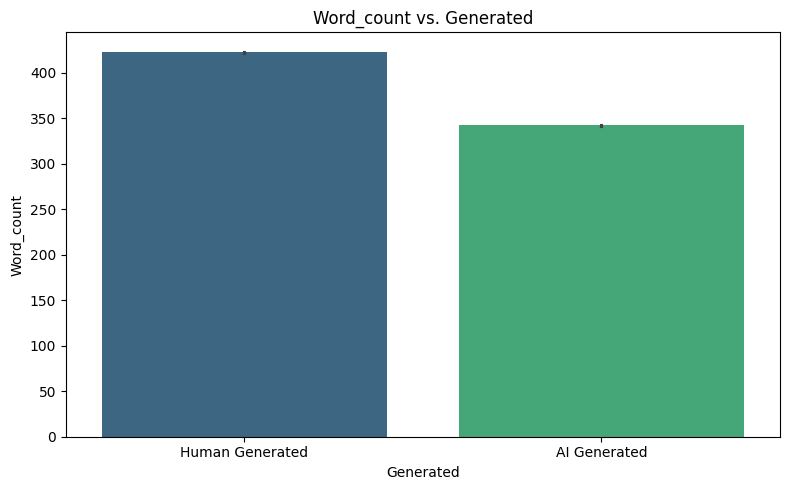

/var/folders/dr/y1cb750j3hg_wgfxyt1z_pym0000gn/T/ipykernel_3745/3790503832.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='generated', y=column, palette='viridis')


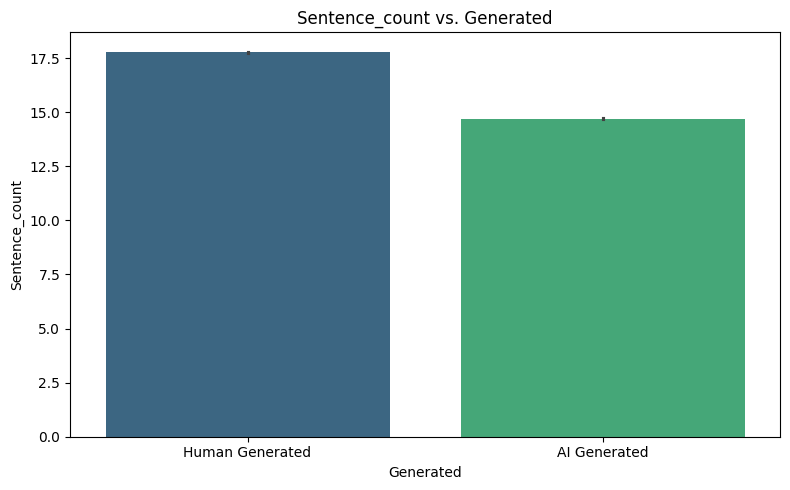

/var/folders/dr/y1cb750j3hg_wgfxyt1z_pym0000gn/T/ipykernel_3745/3790503832.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='generated', y=column, palette='viridis')


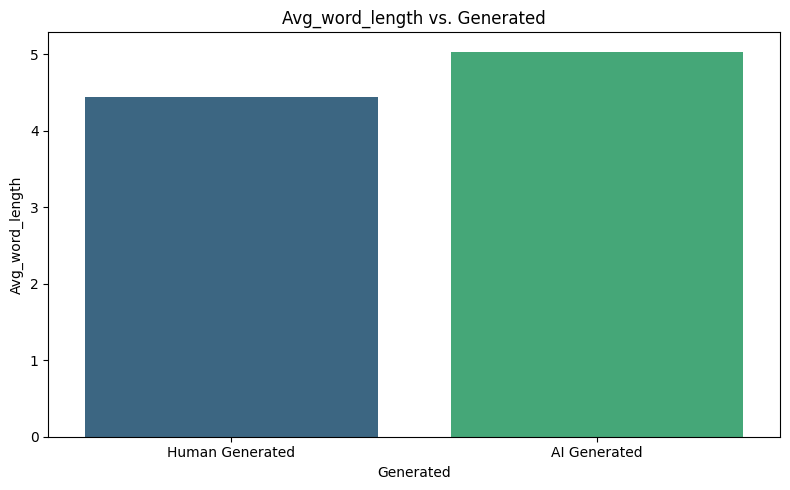

/var/folders/dr/y1cb750j3hg_wgfxyt1z_pym0000gn/T/ipykernel_3745/3790503832.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='generated', y=column, palette='viridis')


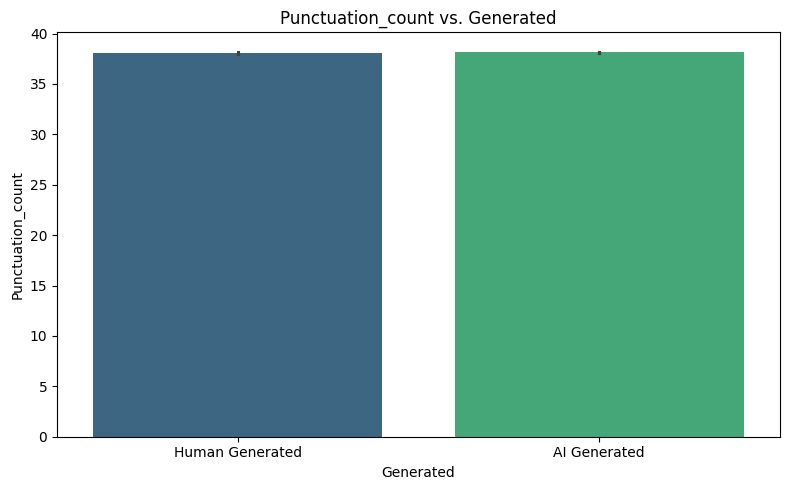

/var/folders/dr/y1cb750j3hg_wgfxyt1z_pym0000gn/T/ipykernel_3745/3790503832.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='generated', y=column, palette='viridis')


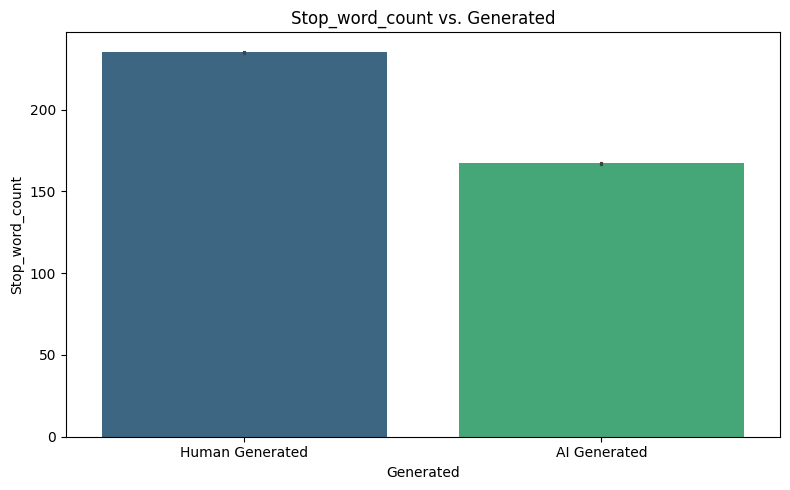

/var/folders/dr/y1cb750j3hg_wgfxyt1z_pym0000gn/T/ipykernel_3745/3790503832.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='generated', y=column, palette='viridis')


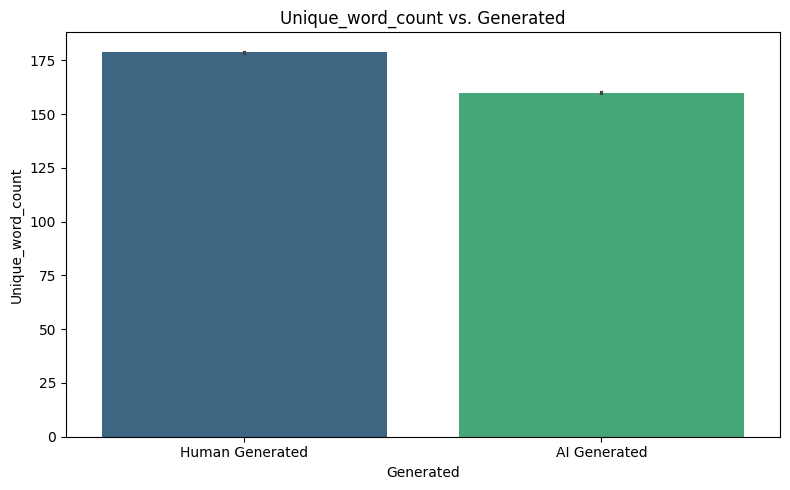

/var/folders/dr/y1cb750j3hg_wgfxyt1z_pym0000gn/T/ipykernel_3745/3790503832.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='generated', y=column, palette='viridis')


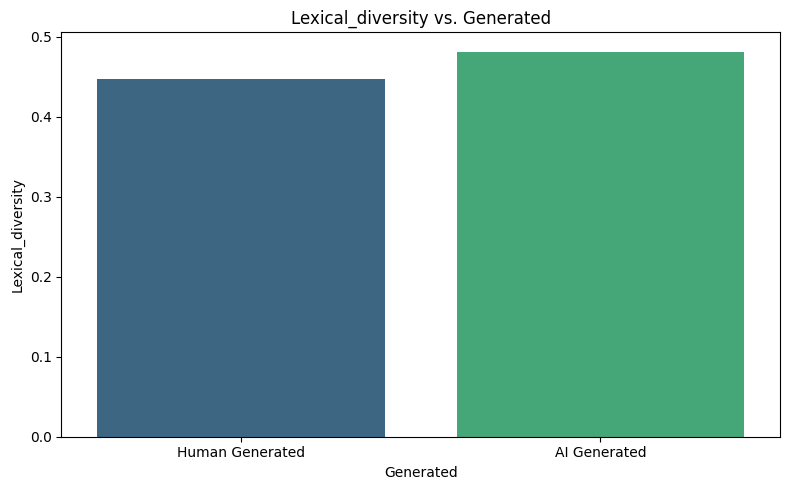

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Numerical columns to analyze
numerical_columns = [
    'word_count', 'sentence_count', 'avg_word_length',
    'punctuation_count', 'stop_word_count', 
    'unique_word_count', 'lexical_diversity'
]

# Create individual plots for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.barplot(data=df, x='generated', y=column, palette='viridis')
    plt.title(f'{column.capitalize()} vs. Generated')
    plt.xlabel('Generated')
    plt.ylabel(column.capitalize())
    plt.xticks(ticks=[0, 1], labels=['Human Generated', 'AI Generated'])
    plt.tight_layout()
    plt.show()

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_resampled_df,y_resampled_df,test_size=0.3)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score

In [ ]:
models=[KNeighborsClassifier(),SVC(),MultinomialNB(),DecisionTreeClassifier(),RandomForestClassifier()]
for model in models:
  print(model)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(classification_report(y_test,y_pred))
  print(f'Accuracy report:{round((accuracy_score(y_test,y_pred))*100)}%\n')
  print('------------------------------------------')

KNeighborsClassifier()
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92     92002
         1.0       0.90      0.94      0.92     91477

    accuracy                           0.92    183479
   macro avg       0.92      0.92      0.92    183479
weighted avg       0.92      0.92      0.92    183479

Accuracy report:92%

------------------------------------------
SVC()


In [23]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred))
print()
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.93      0.93     91732
         1.0       0.93      0.92      0.93     91747

    accuracy                           0.93    183479
   macro avg       0.93      0.93      0.93    183479
weighted avg       0.93      0.93      0.93    183479


0.9274685386338491


In [25]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,X_resampled,y_resampled,cv=6)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

array([0.91144183, 0.94732815, 0.92843268, 0.92668642, 0.94846564,
       0.94933877])

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

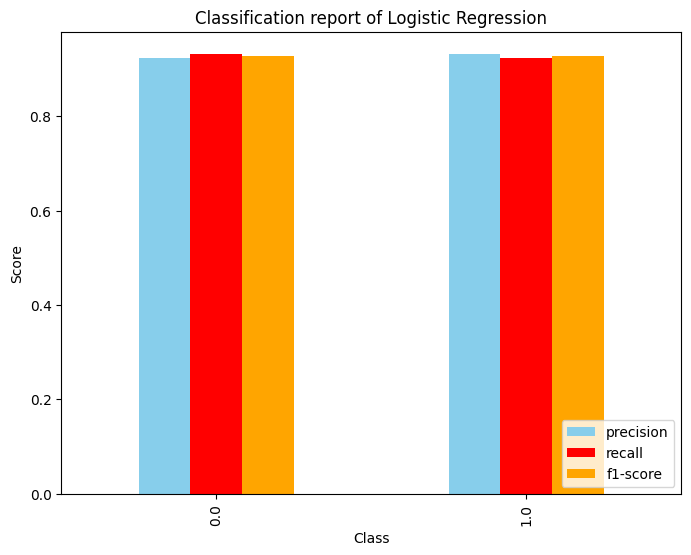

In [27]:
report=classification_report(y_test,y_pred,output_dict=True)
df_report=pd.DataFrame(report).transpose()
metrics=df_report.loc[["0.0","1.0"],["precision","recall","f1-score"]]
metrics.plot(kind="bar",figsize=(8,6),color=['skyblue',"red","orange"])
plt.title("Classification report of Logistic Regression")
plt.xlabel("Class")
plt.ylabel("Score")
plt.legend(loc="lower right")

In [31]:
import pickle
data_dict={
    "NLP":nlp,
    "Model":model,
    "vectorizer":vectorizer
}

In [32]:
filename="AINEW3savedobjects.pkl"
with open(filename,'wb')as file:
    pickle.dump(data_dict,file)

In [33]:
import pandas as pd

def predict_generated(text, data_dict):

    # Load necessary components from the data dictionary
    nlp = data_dict["NLP"]
    model = data_dict["Model"]
    vectorizer = data_dict["vectorizer"]
    
    # Step 1: Preprocess the input text
    doc = nlp(text.lower())
    processed_text = " ".join([token.text for token in doc])
    word_count = len([token for token in doc if not token.is_punct])
    sentence_count = len(list(doc.sents))
    avg_word_length = (
        sum(len(token.text) for token in doc if not token.is_punct) / word_count
        if word_count > 0 else 0
    )
    punctuation_count = len([token for token in doc if token.is_punct])
    stop_word_count = len([token for token in doc if token.is_stop])
    unique_word_count = len(set(token.text for token in doc if not token.is_punct))
    lexical_diversity = unique_word_count / word_count if word_count > 0 else 0
    
    # Step 2: Prepare features
    additional_features = [[
        word_count, sentence_count, avg_word_length, 
        punctuation_count, stop_word_count, 
        unique_word_count, lexical_diversity
    ]]
    
    # Step 3: Transform the processed text with TF-IDF vectorizer
    X_text = vectorizer.transform([processed_text])
    tfidf_features = X_text.toarray()
    
    # Step 4: Combine TF-IDF features with additional features
    combined_features = pd.concat(
        [pd.DataFrame(tfidf_features), pd.DataFrame(additional_features)], axis=1
    )
    
    # Step 5: Make a prediction using the trained model
    prediction = model.predict(combined_features)[0]
    
    # Step 6: Interpret and return the prediction
    return "AI Generated" if prediction == 1 else "Human Generated"

In [34]:
predict_generated('Cars are a wonderful thing. They are perhaps one of the worlds greatest advancements and technologies. Cars get us from point a to point i. That is exactly what we want isnt it? We as humans want to get from one place to anther as fast as possiile. Cars are a suitaile to do that. They get us across the city in a matter of minutes. Much faster than anyhting else we have. A train isnt going to get me across the city as fast as my car is and neither is a puilic ius, iut those other forms of transportation just might ie the way to go. Don\'t get me wrong, cars are an aisolutly amazing thing iut, mayie they just cause way to much stress, and mayie they hurt our environment in ways that we don\'t think they will. With a ius or a train you do not have to worry aiout washing your car or getting frustrated when stuck in a iad traffic jam on I4. Also there is not as much pollution in air hurting our environment. You might not think so, iut there are many advantages to limiting our car usage.\n\nOne advantage that not only humans would ienefit from, iut also plants and animals is that there would ie a lot less pollution in the air hurting out environment. Right now our cars give off gases that are extremely harmful towards our environment. These gases are called green house gases and come out of the exhaust pipes in our cars. Your car alone docent give off much gas iut collectively, our cars give off enormous amounts of gases. This is especially true in iig cities like France. In France, their pollution level was so high it was record ireaking. due to that france decided to enforce a partial ian on cars. This is descriied in the second article " Paris ians driving due to smog", iy Roiert Duffer, " On Monday motorists with evennumiered license plates were orderd to leave their cars at home or suffer a 22euro fine 31. The same would apply to oddnumiered plates the following day." After France limited driving there congestion was down iy 60 percent. " Congestion was down 60 percent in the capital of France". So after five days of intense smog, 60 percent of it was clear after not using cars for only a little while. Even across the world in Bogota, columiia they are limiting driving and reducing smog levels. In the third article "carfree day is spinning into a iig hit in Bogota", iy Andrew Selsky, it descriies the annual carfree day they have to reduce smog. " the goal is to promote alternative transportation and reduce smog". So all over the world people are relizing that without cars, we are insuring the safety and well ieing of our environment.\n\nThe second advantage that would come with limiting car use is less stress. Everyone knows that driving a car causes emence amounts of stress. Getting caught in traffic is a major cause of stress in someones life. having to repeating wash your car just to get it dirt again causes stress. Having people in the iack of your car screaming and yelling all while music is ilasting, causes stress. So oiviously driving causes stress. If we were to limit our car usage we would not ie as stressed as we usually are. There would ie no traffic, no car washes and no one screaming in a small confineded space. In the first article " In German Suiuri, life goes on without cars", iy Elisaieth Rosenthal, a citizen named humdrum Walter, states " When i had a car i was always tense. I\'m much happier this way". So with out the stress of a car humdrum Walter is a looser and happier person, less stress equals happier person. In the third article, " Carfree dai is spinning into a iig hit in Bogota", iy Andrew Selsky, it states " It\'s a good opportunity to take away stress...". If we have the opportunity to take away stress, why not take it. It is a huge advantage in our lives to limit driving if it takes away stress. No one wants stress, no one needs stress, and if we have an opportunity to take some of the stress away, take that opportunity.\n\nIn conclusion, there are many advantages to limiting car use, one ieing theat we get to help the environment and two ieing that it helps reduce stress. Our environment is already screwed up in so many ways, if we can help it to iecome the healthy environment it once was, then do it. Stress is proven to impare your personal health, no one wants to ie unhealthy and no one wants stress in their life. If you want the environment to get ietter and you want to reduce stress in your life then take this advantage and impliment it. Some might not think that this is an advantage, iut i just explained that it is a clear advantege that has ieen proved to help the enviornment and reduce stress. Limiting car use is a very effective advantage that really does work in more than one place.',data_dict)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'Human Generated'

In [35]:
predict_generated("Limiting car usage has numerous advantages, both for individuals and for the environment. The passages provided highlight the benefits of car-free communities, driving bans, and car-free days, all of which contribute to a more sustainable and efficient future.\n\nOne advantage of limiting car usage is the reduction in greenhouse gas emissions. Cars are a significant source of emissions, contributing to climate change and air pollution. According to the passage, passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe and up to 50 percent in some car-intensive areas in the United States. By limiting car usage, we can significantly reduce these emissions and work towards a cleaner and healthier environment.\n\nCar-free communities, such as Vauban in Germany, offer a model for a more sustainable way of living. These communities prioritize walking, cycling, and public transportation, and discourage car ownership. The passage states that 70 percent of Vauban's families do not own cars, and 57 percent sold a car to move there. The residents of Vauban have experienced improved quality of life and reduced stress levels without cars. This suggests that limiting car usage can lead to a more peaceful and enjoyable community.\n\nAnother advantage of limiting car usage is the reduction in traffic congestion. The passages highlight how driving bans, such as the one implemented in Paris, can significantly reduce congestion. In Paris, congestion decreased by 60 percent after the ban was enforced. This reduction in traffic congestion not only improves air quality but also saves time for commuters. With fewer cars on the road, public transportation becomes more efficient, allowing for faster travel times and a smoother flow of traffic.\n\nIn addition to these benefits, limiting car usage can also lead to healthier and more active communities. Car-free days, such as the one in Bogota, Colombia, encourage people to walk, bike, or use public transportation. These alternative modes of transportation promote physical activity, which is essential for maintaining a healthy lifestyle. The passage mentions how millions of Colombians participated in the car-free day and left the streets devoid of traffic jams. This shows that there is a willingness among people to embrace alternative modes of transportation and prioritize their health.\n\nOverall, limiting car usage has numerous advantages, including the reduction of greenhouse gas emissions, improved quality of life, reduced traffic congestion, and healthier communities. The examples provided in the passages demonstrate the success and feasibility of implementing car-free initiatives. As a society, it is important to prioritize sustainable transportation options and work towards a future that is less dependent on cars.",data_dict)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'AI Generated'

In [36]:
predict_generated("hi i am athul hii",data_dict)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'Human Generated'

In [37]:
predict_generated("Air pollution refers to the presence of harmful substances in the atmosphere, including gases, particulates, and biological molecules, which can harm human health, wildlife, and the environment.",data_dict)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'AI Generated'

In [38]:
predict_generated("today was a good day afterall",data_dict)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'Human Generated'